# **Data Description**



IUD - Intra Uterine Device (a form of contraceptive)

STDs - Sexually Transmitted Diseases

HPV - Human Papilloma Virus

HIV - Human Immunodeficiency Virus

AIDS - Acquired Immunodeficiency Syndrome (caused by HIV)

CIN - Cervical Intraepithelial Neoplasia

Dx - Medical Abbreviation for Diagnosis

# **Basic Steps**

In [11]:
#importing requried libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py 

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

In [126]:
#reading and displaying first 5 rows of data
data = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [14]:
#displaying last 10 rows of data
data.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [15]:
#displaying shape of data
data.shape

(858, 36)

In [16]:
#exhibiting columns
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [17]:
#exhibiting index
data.index

RangeIndex(start=0, stop=858, step=1)

# **Variable identification**

In [18]:
#displaying datatypes of featues
data.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [19]:
#finding the number of object datatypes
data.dtypes[data.dtypes == 'object']

Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV                              object
STDs:Hepat

In [20]:
#identifying the int datatype
data.dtypes[data.dtypes == 'int64']

Age                          int64
STDs: Number of diagnosis    int64
Dx:Cancer                    int64
Dx:CIN                       int64
Dx:HPV                       int64
Dx                           int64
Hinselmann                   int64
Schiller                     int64
Citology                     int64
Biopsy                       int64
dtype: object

In [21]:
#pd.to_numeric(data['Number of sexual partners'])

In [22]:
#checking missing values in data
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [23]:
#displaying the first 5 rows of data having biopsy equals to 1
data[data['Biopsy'] == 1].head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
22,40,1.0,18.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,2.0,0,0,0,0,0,1,1,1
23,40,1.0,20.0,2.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,1,1,0,1
41,37,2.0,18.0,?,0.0,0.0,0.0,0.0,0.0,?,?,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,15.0,15.0,0,1,0,1,0,1,0,1
44,37,3.0,19.0,3.0,1.0,12.0,6.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,1,0,1


In [24]:
#proportion of biopsy 
data['Biopsy'].value_counts(normalize = True)

0    0.935897
1    0.064103
Name: Biopsy, dtype: float64

In [25]:
data.loc[data['STDs: Time since last diagnosis'] == '?','STDs: Time since last diagnosis'].value_counts()#,'STDs: Time since last diagnosis']]

?    787
Name: STDs: Time since last diagnosis, dtype: int64

In [26]:
#dropping the STDs: Time since last diagnosis
#data = data.drop(columns =['STDs: Time since last diagnosis','STDs: Time since first diagnosis'],axis =1)


In [27]:
data.loc[data['Age'] == '?','Age']

Series([], Name: Age, dtype: int64)

# **KDE plots**

In [127]:
cancer_age = data['Age'][data['Biopsy'] == 1]
cancer_age

6      51
22     40
23     40
41     37
44     37
64     38
93     33
96     35
103    38
131    30
163    28
185    28
203    28
205    25
214    30
216    29
224    24
257    22
264    22
314    21
320    22
325    20
335    29
345    22
370    21
377    20
383    19
421    26
434    20
472    35
496    27
530    21
539    18
549    34
578    19
598    17
610    21
614    24
653    21
655    21
664    38
670    47
671    52
673    48
686    35
687    33
688    28
693    18
739    28
753    20
754    28
781    33
786    25
797    33
814    16
Name: Age, dtype: int64

In [128]:
#mean age of women who has cancer
data[data['Biopsy'] == 1]['Age'].mean()

28.636363636363637

Text(0.5, 1.0, 'age of women who has cancer')

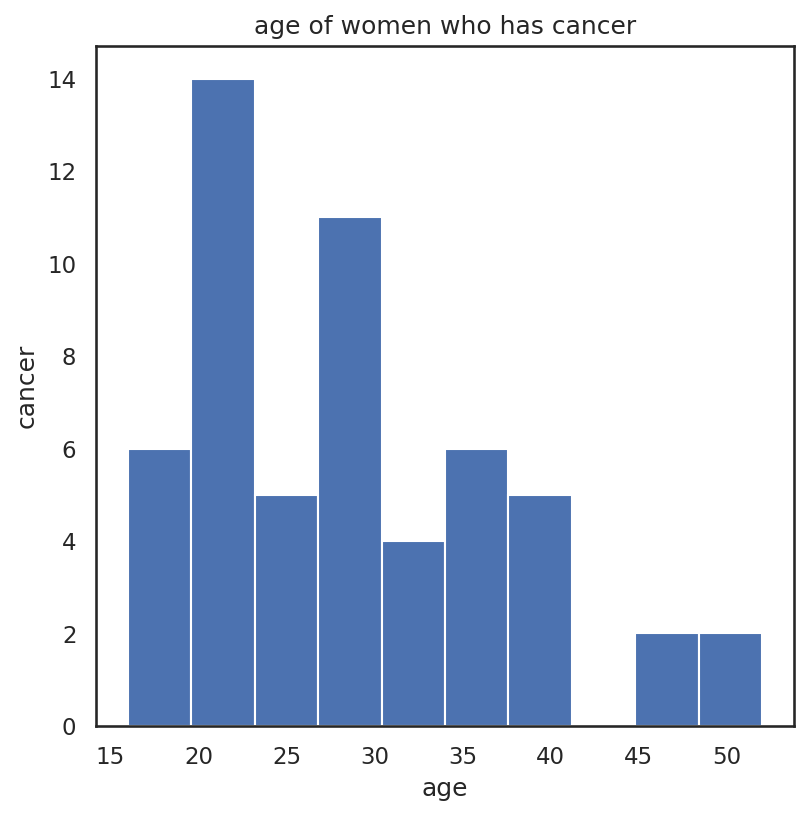

In [129]:
#plottting histogram
plt.figure(figsize = (6,6),dpi = 150)
plt.hist(cancer_age)
plt.xlabel('age')
plt.ylabel('cancer')
plt.title('age of women who has cancer')

Text(0.5, 1.0, 'age of women who has cancer')

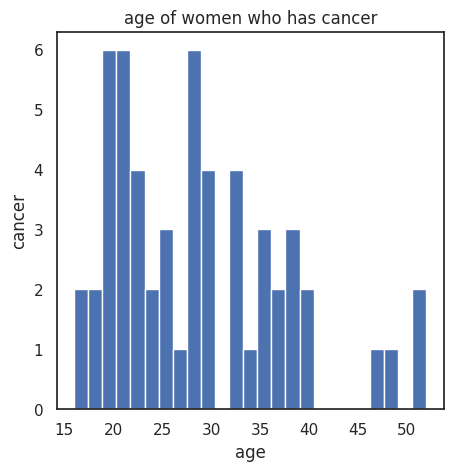

In [130]:
#plottting histogram with 25bins
plt.figure(figsize = (5,5),dpi = 100)
plt.hist(cancer_age,bins = 25)
plt.xlabel('age')
plt.ylabel('cancer')
plt.title('age of women who has cancer')

Text(0.5, 1.0, 'age of women who has cancer')

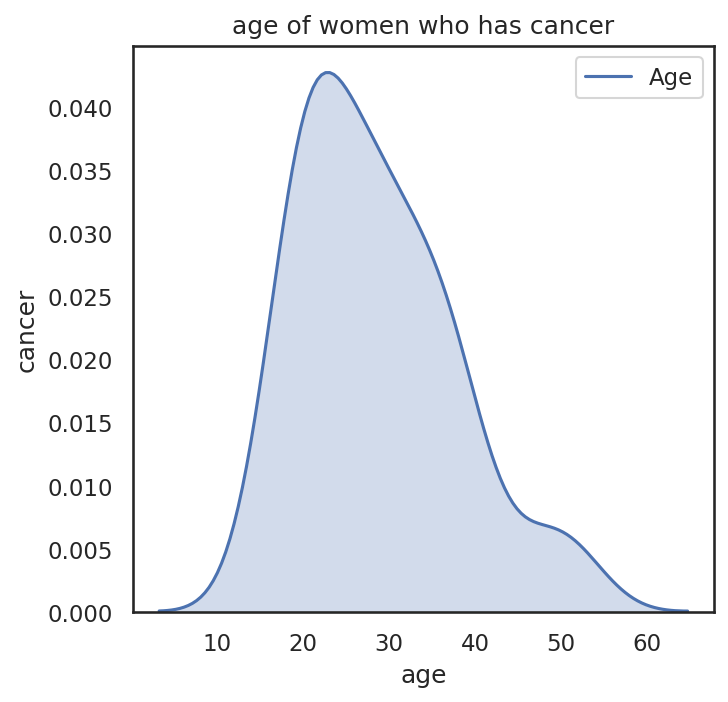

In [131]:
#Kde plot
plt.figure(figsize = (5,5),dpi = 150)
sns.kdeplot(cancer_age,shade = True)
plt.xlabel('age')
plt.ylabel('cancer')
plt.title('age of women who has cancer')

In [132]:
#mean,median and spread
mean = cancer_age.mean()
median = cancer_age.median()
spread = cancer_age.mean()- cancer_age.std(), cancer_age.mean()+cancer_age.std() 

# showing
mean, median, spread

(28.636363636363637, 28.0, (19.75157923045969, 37.52114804226758))

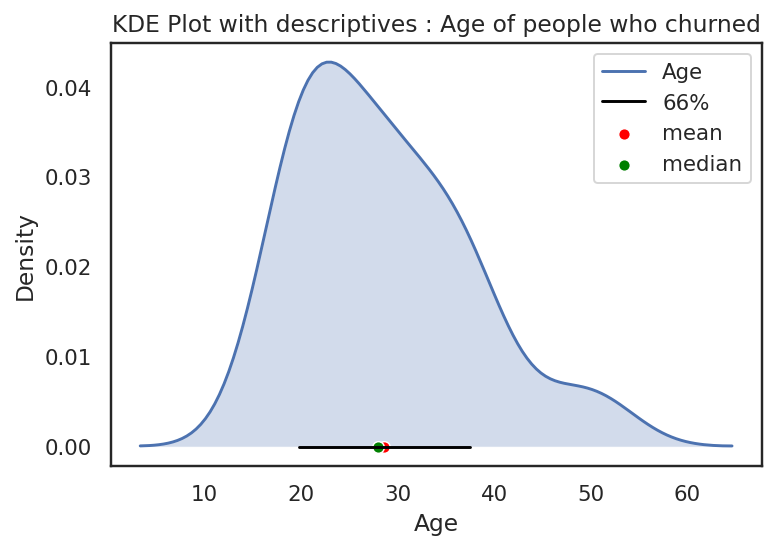

In [133]:
#plotting KDE plot with descriptives
plt.figure(dpi = 140)
sns.kdeplot(cancer_age, shade = True)
sns.scatterplot( [mean], [0], color='red', label='mean')
sns.scatterplot( [median], [0], color='green', label='median')
sns.lineplot( spread, [0,0], color='black', label='66%')
plt.xlabel("Age")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives : Age of people who churned")
plt.show()

# **Mean_Variance**

In [ ]:
#mean of age
data['Age'].mean()

26.82051282051282

In [ ]:
#median of Age
data['Age'].median()

25.0

In [ ]:
#mode of Number of sexual partners
data['Number of sexual partners'].mode()[0]

'2.0'

In [ ]:
#standard deviation and variance of age
data['Age'].std(), data['Age'].var()

(8.497948065482593, 72.21512132363935)

In [ ]:
#descriptive statistics of continuous variables in data
data.describe( )

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


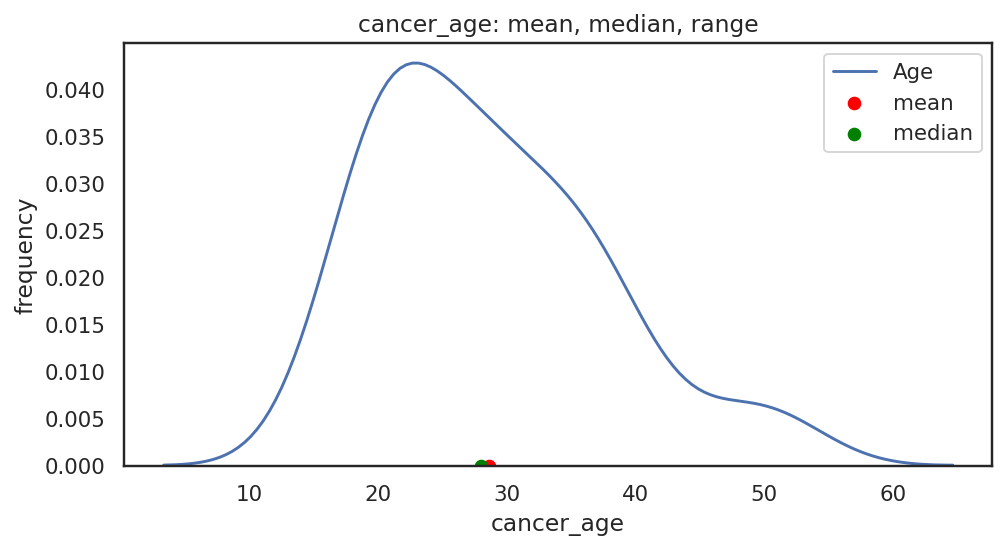

In [ ]:
plt.figure(figsize = (8,4), dpi = 140)
#dpi means dots per inch
#total no.of pixels = 8*140 + 4* 140

# Plotting histogram and descriptive summary
plt.scatter(cancer_age.mean(), 0, label = 'mean', color = 'red')
plt.scatter(cancer_age.median(), 0, label = 'median', color = 'green')
#plt.hist(cancer_age,bins=10)
sns.kdeplot(cancer_age)
# axes labels
plt.xlabel('cancer_age')
plt.ylabel('frequency')
plt.title('cancer_age: mean, median, range')
plt.legend()

# **Min_Max_Rangeupdated**

In [ ]:
#isolating numerical columns
numerical_cols = data.select_dtypes(include = ['int64','float64'])
numerical_cols.head()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0
2,34,0,0,0,0,0,0,0,0,0
3,52,0,1,0,1,0,0,0,0,0
4,46,0,0,0,0,0,0,0,0,0


In [ ]:
#observation with Hormonal Contraceptives (years)
data[data['Hormonal Contraceptives (years)']  == data['Hormonal Contraceptives (years)'].min()]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,35,2.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
847,30,3.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
850,19,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
851,23,2.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


# **continous_distribution**

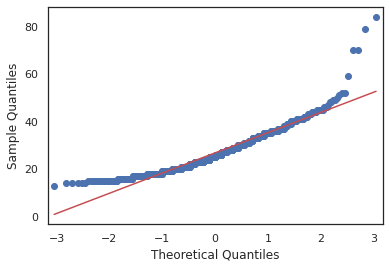

In [ ]:
#qq plot to check normality
sm.qqplot(data['Age'], line='s') 
py.show() 

In [ ]:
#skewness
data['Age'].skew()

1.3942787673006407

In [ ]:
#kurtosis
data['Age'].kurtosis()

4.778575147648968

# **Univariate Analysis : Numerical Variables**

In [ ]:
data.head(60)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
data['Biopsy'] = data['Biopsy'].astype('category')
data.dtypes

Age                                      int64
Number of sexual partners               object
First sexual intercourse                object
Num of pregnancies                      object
Smokes                                  object
Smokes (years)                          object
Smokes (packs/year)                     object
Hormonal Contraceptives                 object
Hormonal Contraceptives (years)         object
IUD                                     object
IUD (years)                             object
STDs                                    object
STDs (number)                           object
STDs:condylomatosis                     object
STDs:cervical condylomatosis            object
STDs:vaginal condylomatosis             object
STDs:vulvo-perineal condylomatosis      object
STDs:syphilis                           object
STDs:pelvic inflammatory disease        object
STDs:genital herpes                     object
STDs:molluscum contagiosum              object
STDs:AIDS    

In [ ]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

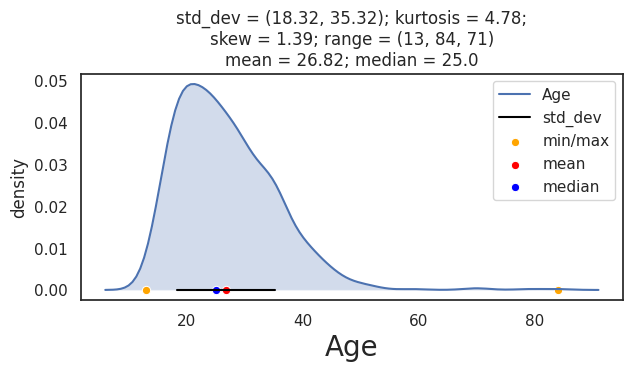

In [ ]:
#Univariate Analysis of patient details
UVA_numeric(data,['Age'])

In [ ]:
#UVA_numeric(data,DX)

# **Univariate Analysis : Categorical**

In [ ]:
#segragating variables into groups
patient_details = ['Number of sexual partners', 'First sexual intercourse','Num of pregnancies']
smoking_habits = ['Smokes', 'Smokes (years)', 'Smokes (packs/year)']
contraceptives =['Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD','IUD (years)']
STD1 = ['STDs', 'STDs (number)', 'STDs:condylomatosis','STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis']
STD2 = ['STDs:vulvo-perineal condylomatosis', 'STDs:syphilis','STDs:pelvic inflammatory disease', 'STDs:genital herpes']
STD3 = ['STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis']
DX = ['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']
Diseases = ['Hinselmann', 'Schiller','Citology']
Diagnoses_time =['STDs: Time since last diagnosis','STDs: Time since first diagnosis']

In [ ]:
#changing the datatype to category and then checking
data['Dx:Cancer'] = data['Dx:Cancer'].astype('category')
data['Dx:CIN'] = data['Dx:CIN'].astype('category')
data['Dx:HPV'] = data['Dx:HPV'].astype('category')
data['Dx'] = data['Dx'].astype('category')
data['Hinselmann'] = data['Hinselmann'].astype('category')
data['Schiller'] = data['Schiller'].astype('category')
data['Citology'] = data['Citology'].astype('category')
data['STDs: Number of diagnosis'] = data['STDs: Number of diagnosis'].astype('category')
data.dtypes,data.shape

(Age                                      int64
 Number of sexual partners               object
 First sexual intercourse                object
 Num of pregnancies                      object
 Smokes                                  object
 Smokes (years)                          object
 Smokes (packs/year)                     object
 Hormonal Contraceptives                 object
 Hormonal Contraceptives (years)         object
 IUD                                     object
 IUD (years)                             object
 STDs                                    object
 STDs (number)                           object
 STDs:condylomatosis                     object
 STDs:cervical condylomatosis            object
 STDs:vaginal condylomatosis             object
 STDs:vulvo-perineal condylomatosis      object
 STDs:syphilis                           object
 STDs:pelvic inflammatory disease        object
 STDs:genital herpes                     object
 STDs:molluscum contagiosum             

In [ ]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes, data.shape

(Number of sexual partners               object
 First sexual intercourse                object
 Num of pregnancies                      object
 Smokes                                  object
 Smokes (years)                          object
 Smokes (packs/year)                     object
 Hormonal Contraceptives                 object
 Hormonal Contraceptives (years)         object
 IUD                                     object
 IUD (years)                             object
 STDs                                    object
 STDs (number)                           object
 STDs:condylomatosis                     object
 STDs:cervical condylomatosis            object
 STDs:vaginal condylomatosis             object
 STDs:vulvo-perineal condylomatosis      object
 STDs:syphilis                           object
 STDs:pelvic inflammatory disease        object
 STDs:genital herpes                     object
 STDs:molluscum contagiosum              object
 STDs:AIDS                              

In [ ]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (15*size,10), dpi = 150)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

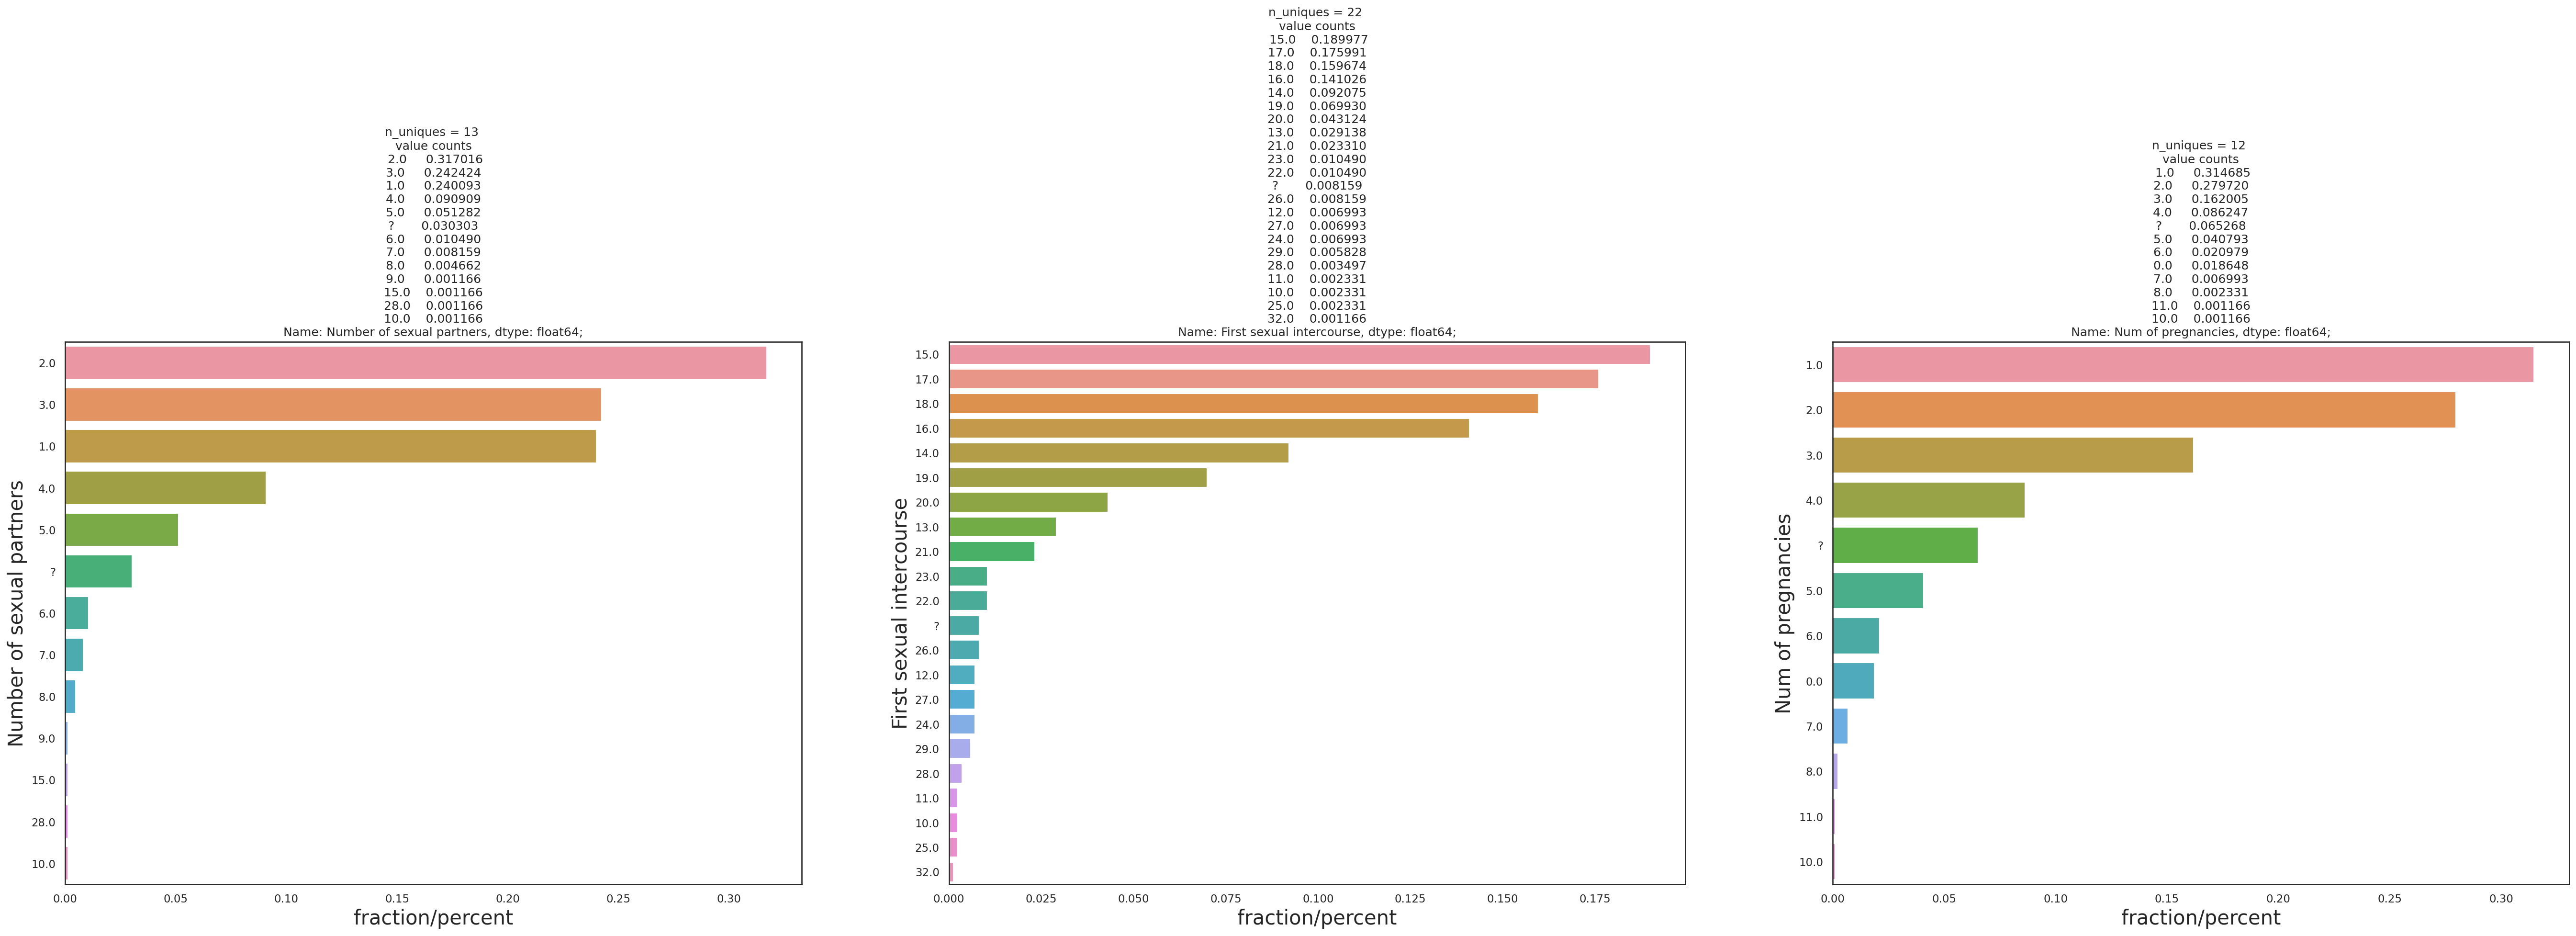

In [ ]:
UVA_category(data,patient_details)

* More women having mumber of sexual partners 2,3,1 

* Many women having first sexual intercourse between 15 to 18

* Most women having number of pregnancies 1,2 and 3

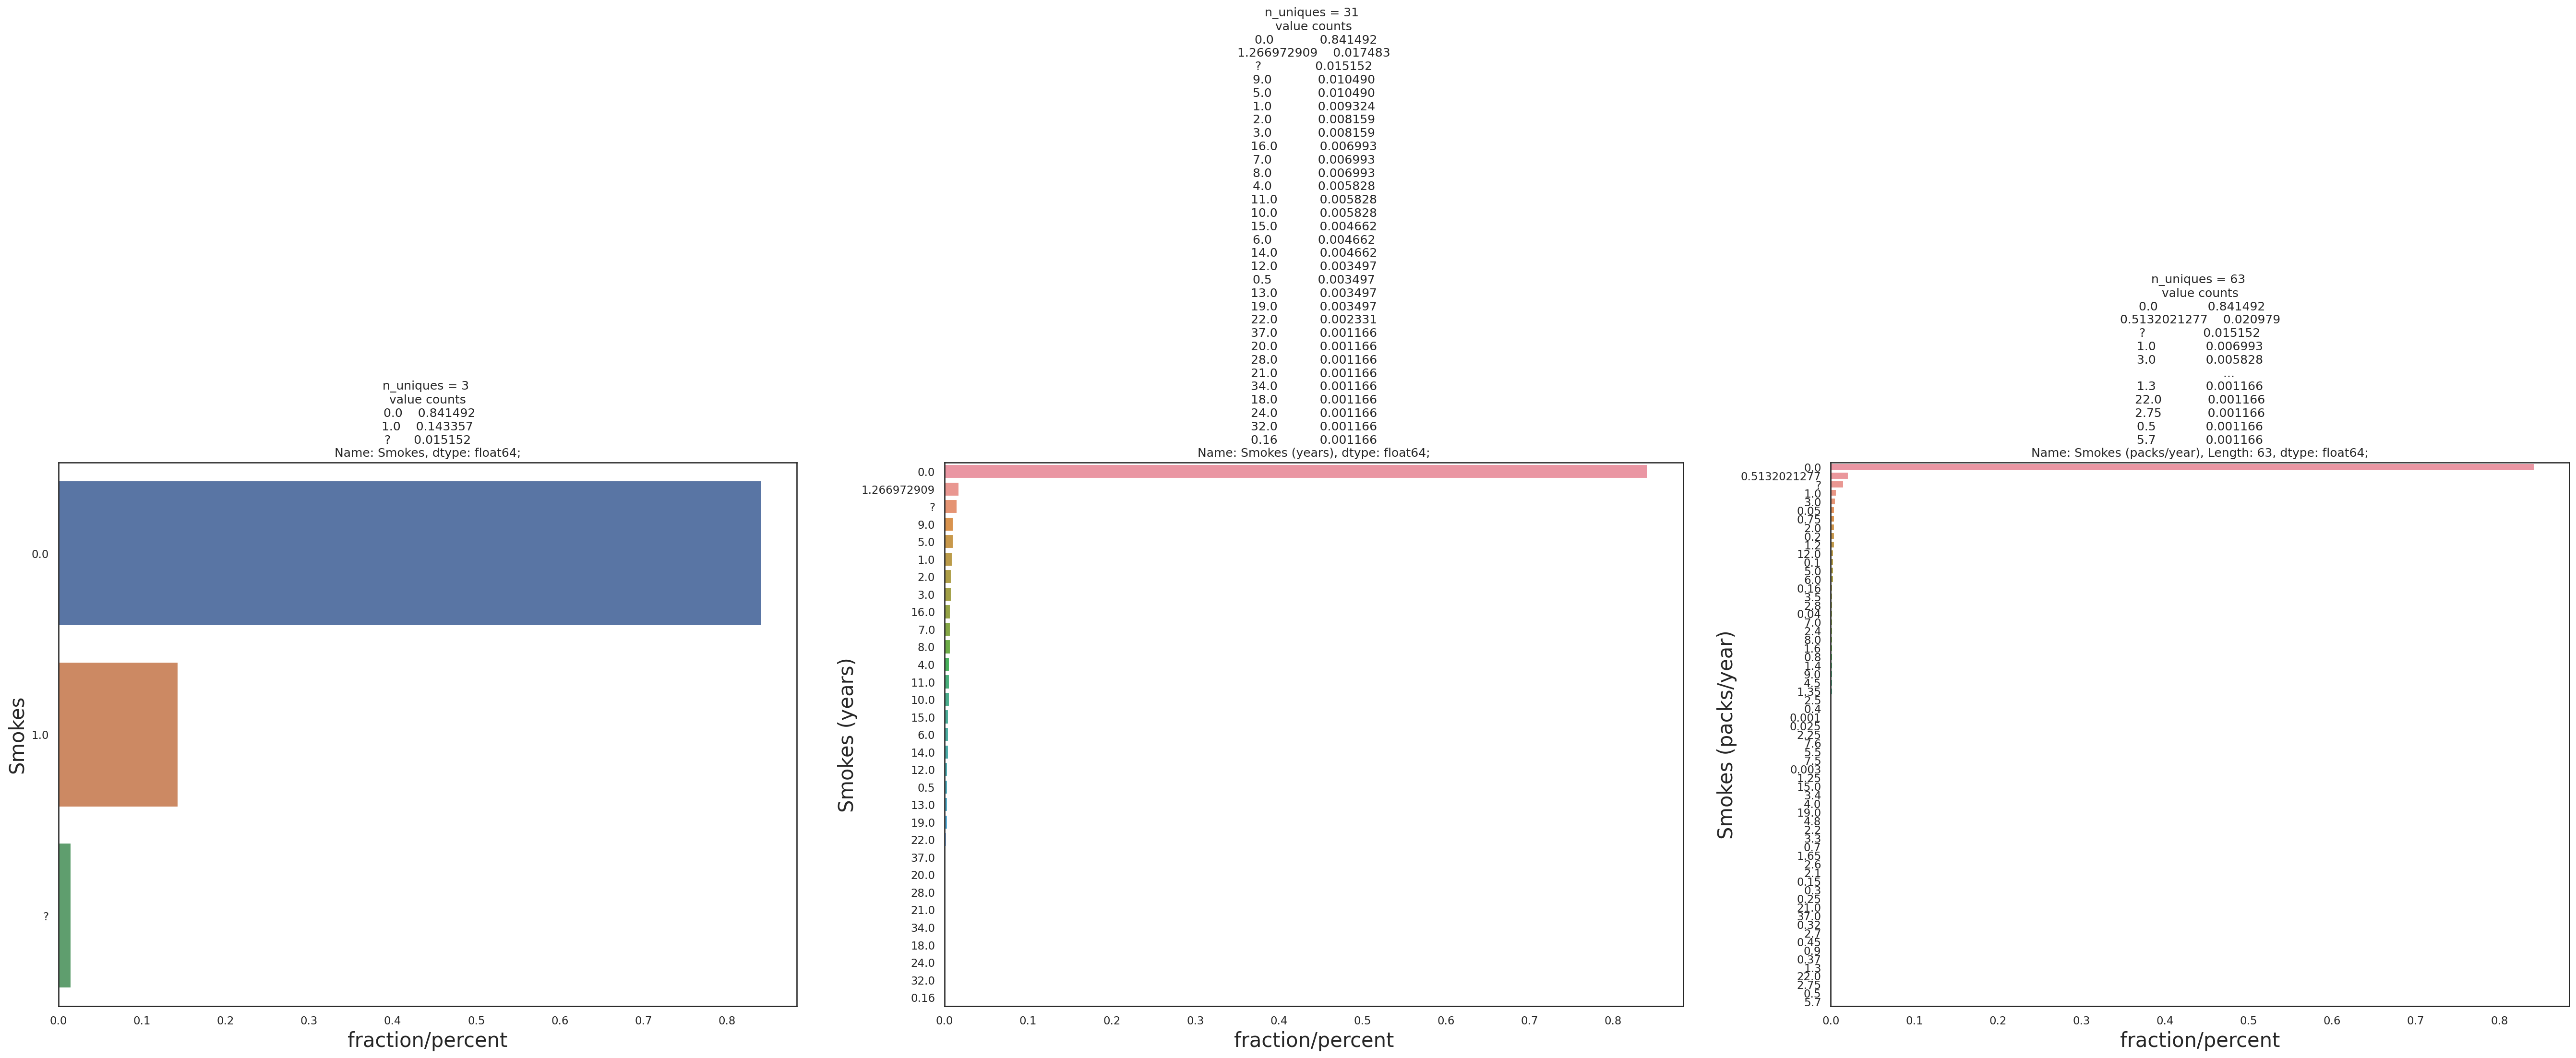

In [ ]:
UVA_category(data,smoking_habits)

more than 80% having smoke_dtails Zero

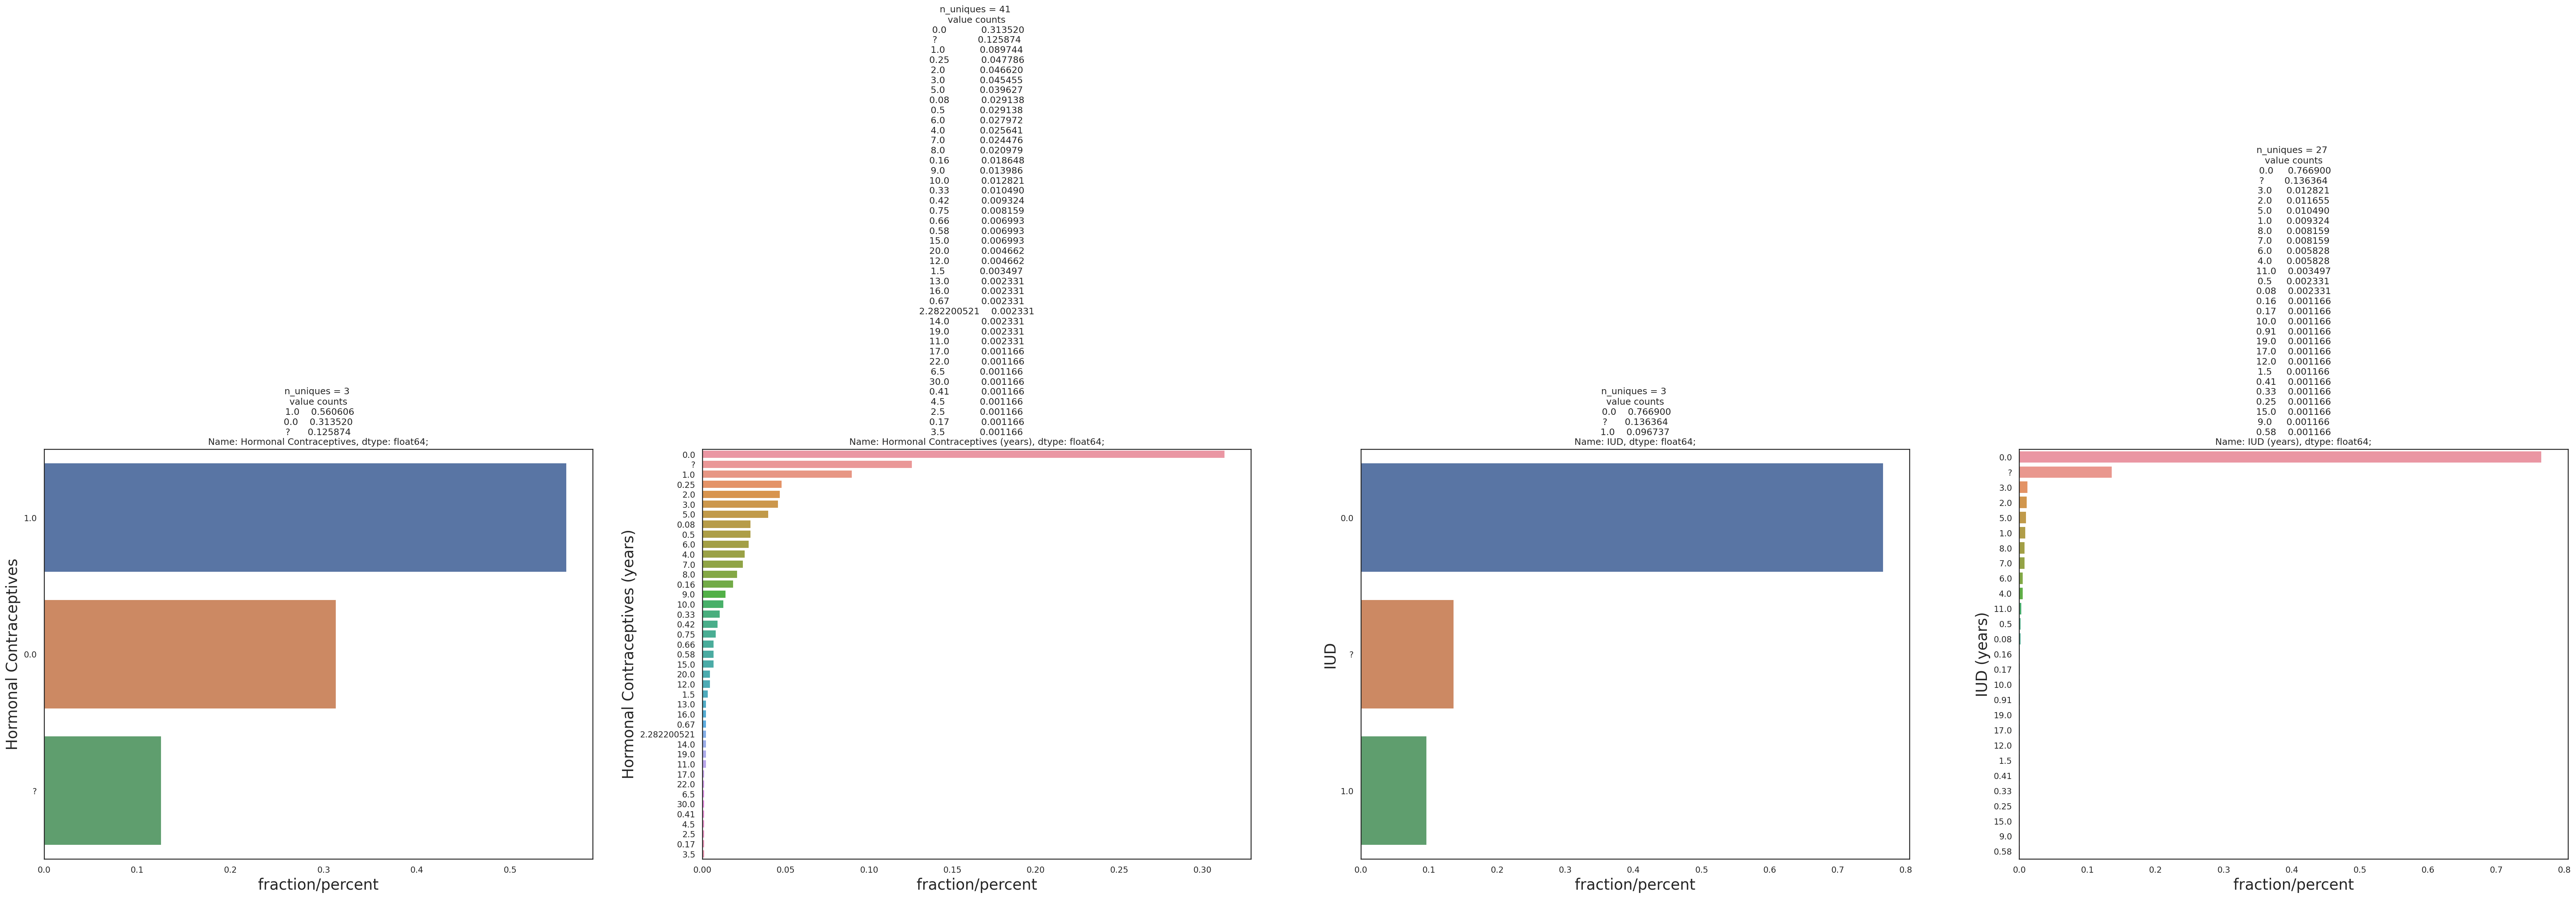

In [ ]:
UVA_category(data,contraceptives)

* contraceptive details belongs to category Zero except for Hormonal contraceptives

* For Hormonal contraceptives category 1 exceeds remaining values

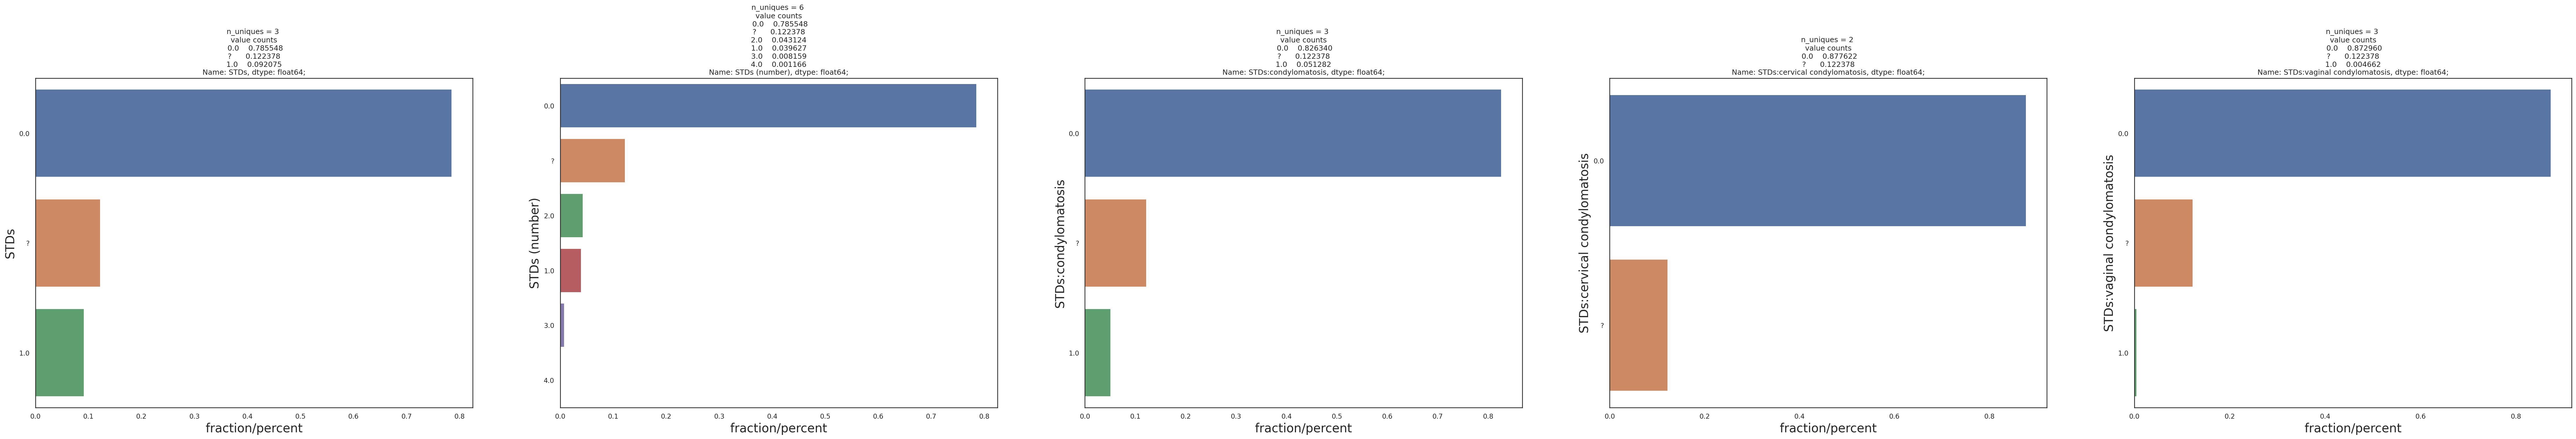

In [ ]:
UVA_category(data,STD1)

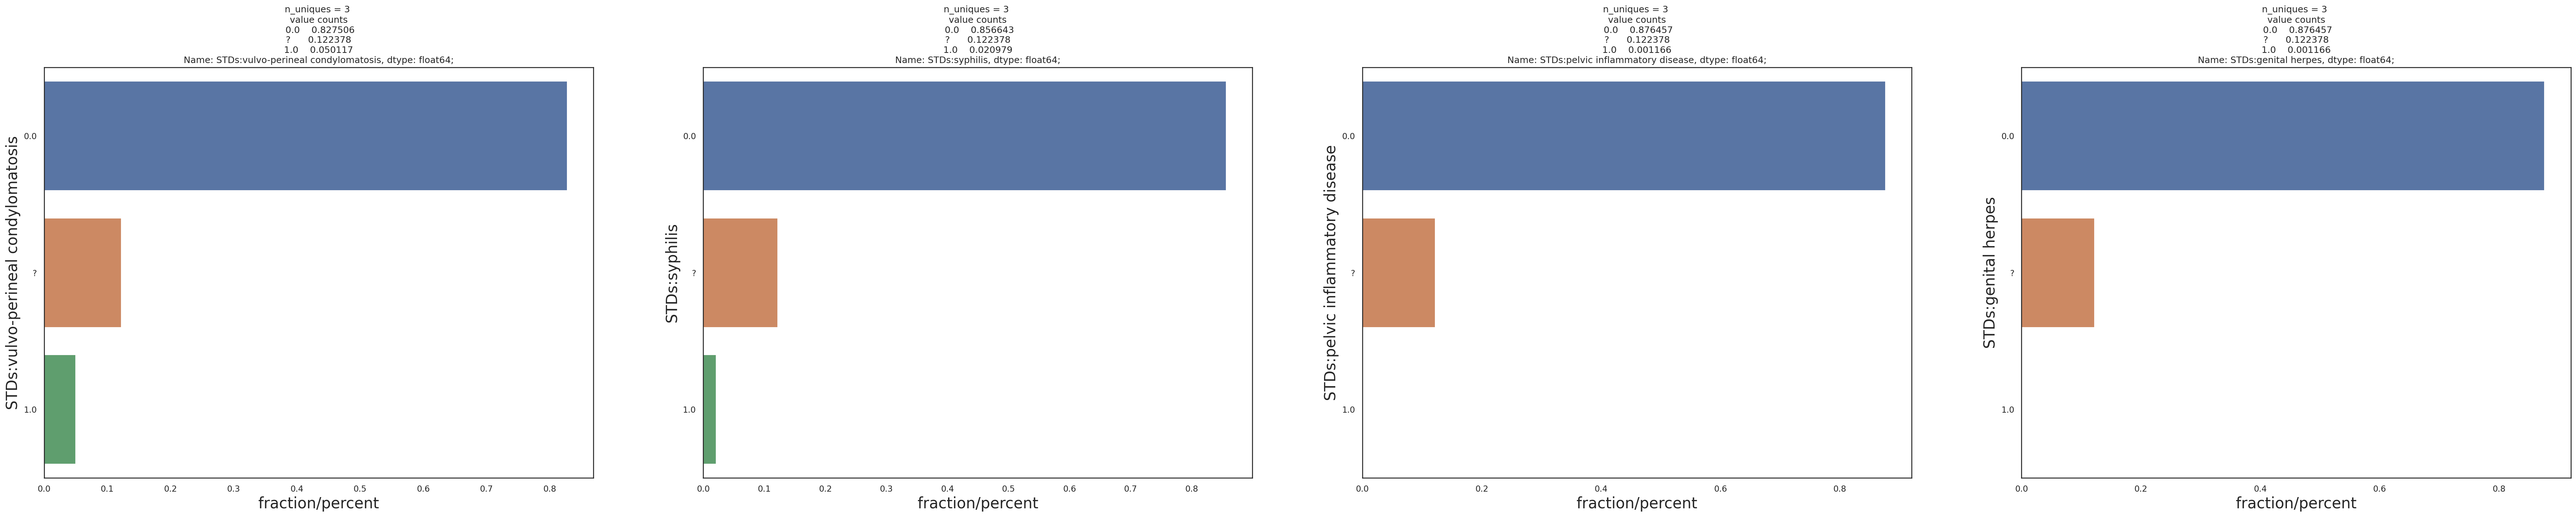

In [ ]:
UVA_category(data,STD2)

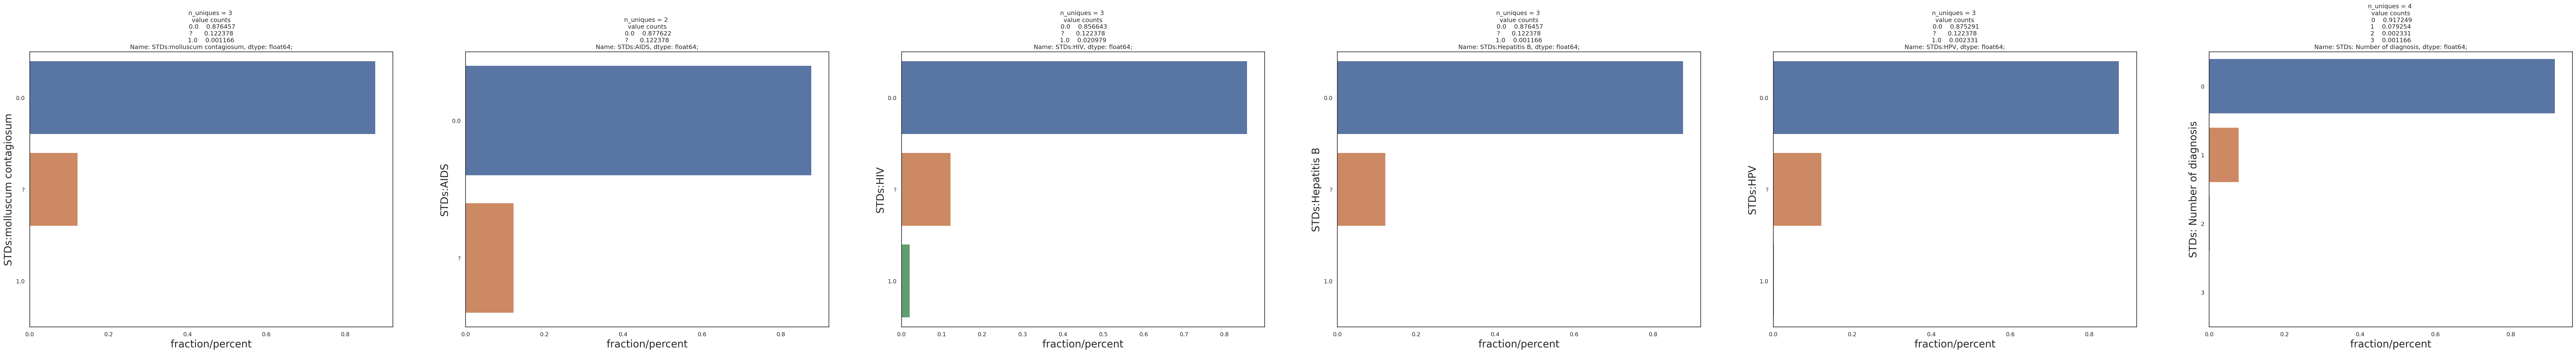

In [ ]:
UVA_category(data,STD3)

In [ ]:
UVA_category(data,DX)

Error in callback <function flush_figures at 0x7f3ca8432bf8> (for post_execute):


KeyboardInterrupt: ignored

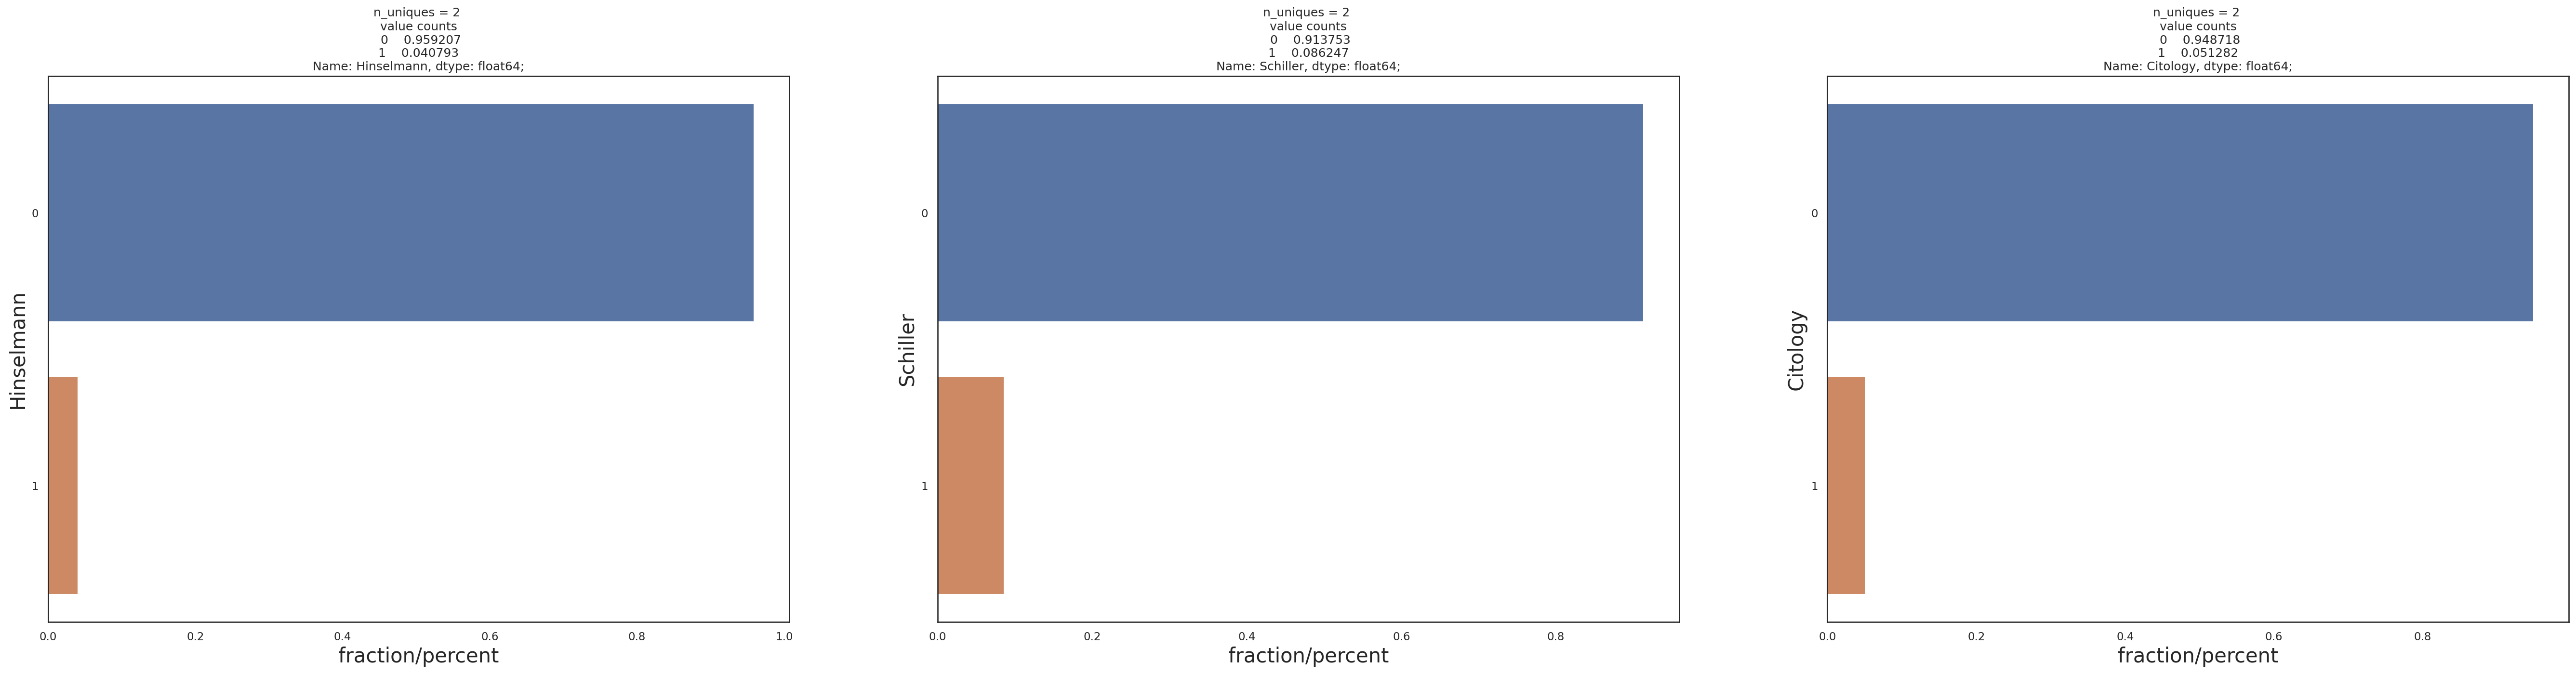

In [ ]:
UVA_category(data,Diseases)

* STD1, STD2, STD3, DX and Diseases having value 0 occupies more proportion

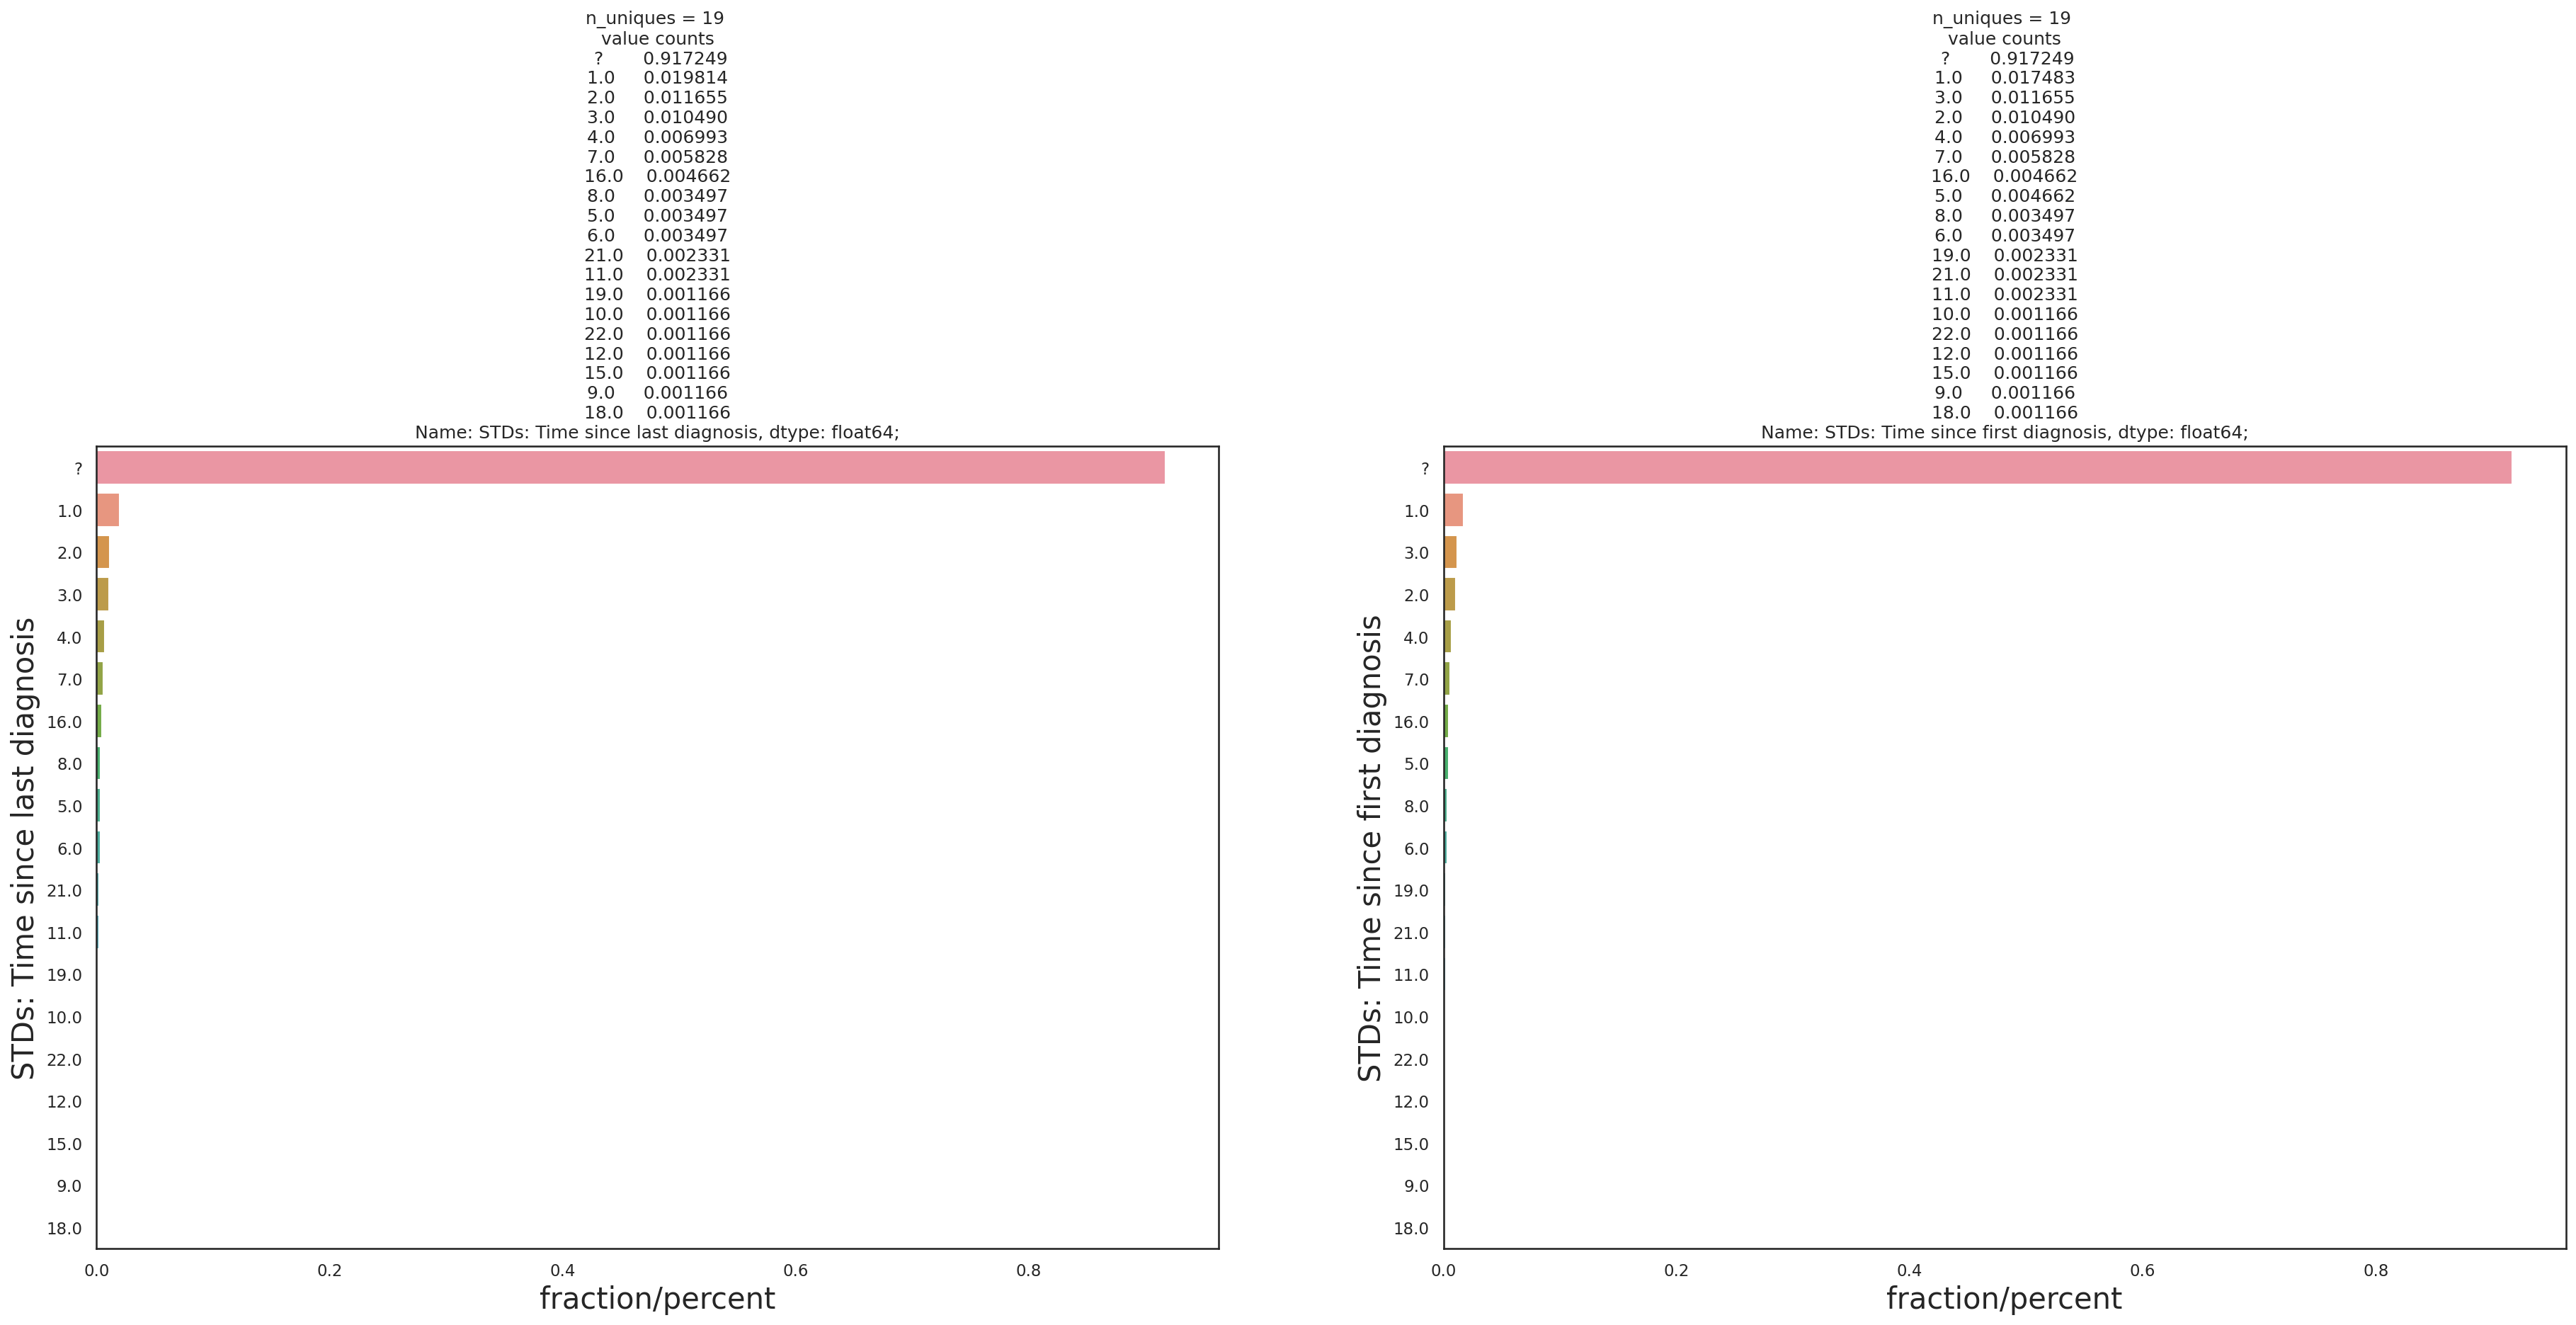

In [ ]:
UVA_category(data,Diagnoses_time)

* Majority of Diagnoses_time belong to category '?'

# **Univariate Analysis : missing values**

In [ ]:
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


* we do not have any missing values but we need to investigate the peculiar category ?

# **Univaariate Analysis : Outlier detetcion**

In [ ]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    '''quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])'''

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      '''plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))'''

True


TypeError: ignored

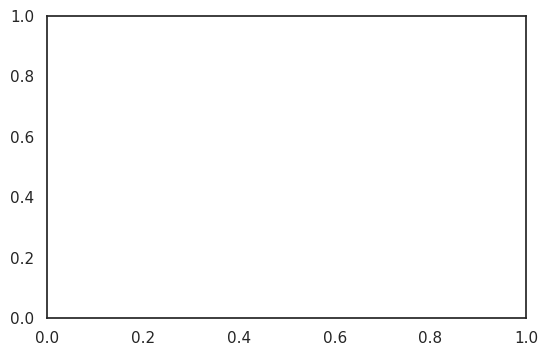

In [ ]:
UVA_outlier(data, patient_details)

In [ ]:
data.columns

# **MultiVariate Analysis : categorical - categorical**

In [ ]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

In [ ]:
data.select_dtypes(include =['object', 'category']).dtypes

In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'Number of sexual partners')

In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'First sexual intercourse')

In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'Smokes')

In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'Hormonal Contraceptives')


In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'Hormonal Contraceptives (years)')

In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'IUD')

In [ ]:
 BVA_categorical_plot(data, 'Biopsy', 'IUD (years)')

In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'STDs:AIDS')

In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'STDs')

In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'Dx:HPV')

In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'Dx')

In [ ]:
BVA_categorical_plot(data, 'Biopsy', 'Dx:Cancer')

In [ ]:
BVA_categorical_plot(data, 'Biopsy','STDs: Time since last diagnosis')


In [ ]:
BVA_categorical_plot(data, 'Biopsy','STDs: Time since first diagnosis')

In [ ]:
BVA_categorical_plot(data, 'Biopsy','Hinselmann')

In [ ]:
 BVA_categorical_plot(data, 'Biopsy','Schiller')

In [ ]:
 BVA_categorical_plot(data, 'Biopsy','Citology')

# **Multivariate Analysis : Continous- categorical**

In [ ]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [ ]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [ ]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

In [ ]:
Bivariate_cont_cat(data, 'Age', 'Biopsy', 1)


* customers who have churned has significantly higher age

# **imputing special value**

* inorder to work with ML algorithms we need to have numerical values since we have special character '?' we need to to convert it some extreme value

In [29]:
data.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [134]:
data.loc[(data['Age'] == '?'),'Age'].value_counts()









Series([], Name: Age, dtype: int64)

* there is no special charecter in age variable


In [135]:
data.loc[(data['Number of sexual partners'] == '?'),'Number of sexual partners'].value_counts()

?    26
Name: Number of sexual partners, dtype: int64

* we have 26 number of special character '?'

In [136]:
data.loc[(data['Number of sexual partners'] == '?'),'Number of sexual partners'] = 999
data['Number of sexual partners'] = data['Number of sexual partners'].astype('category')

In [137]:
#checking for special character
data.loc[(data['Number of sexual partners'] == '?'),'Number of sexual partners'].value_counts()

9.0     0
8.0     0
7.0     0
6.0     0
5.0     0
4.0     0
3.0     0
28.0    0
2.0     0
15.0    0
10.0    0
1.0     0
999     0
Name: Number of sexual partners, dtype: int64

In [138]:
data.loc[(data['First sexual intercourse'] == '?'),'First sexual intercourse'].value_counts()

?    7
Name: First sexual intercourse, dtype: int64

* there are seven instances having'?'

In [139]:
data.loc[(data['First sexual intercourse'] == '?'),'First sexual intercourse'] = 999
data['First sexual intercourse'] = data['First sexual intercourse'].astype('category')

In [140]:
data.loc[(data['First sexual intercourse'] == '?'),'First sexual intercourse'].value_counts()

32.0    0
29.0    0
10.0    0
11.0    0
12.0    0
13.0    0
14.0    0
15.0    0
16.0    0
17.0    0
18.0    0
19.0    0
20.0    0
21.0    0
22.0    0
23.0    0
24.0    0
25.0    0
26.0    0
27.0    0
28.0    0
999     0
Name: First sexual intercourse, dtype: int64

In [141]:
data.loc[(data['Num of pregnancies'] == '?'),'Num of pregnancies'].value_counts()

?    56
Name: Num of pregnancies, dtype: int64

56 instances has '?

In [142]:
data.loc[(data['Num of pregnancies'] == '?'),'Num of pregnancies'] = 999
data['Num of pregnancies'].astype('category')

0      1.0
1      1.0
2      1.0
3      4.0
4      4.0
      ... 
853    0.0
854    1.0
855    0.0
856    2.0
857    1.0
Name: Num of pregnancies, Length: 858, dtype: category
Categories (12, object): [999, 0.0, 1.0, 10.0, ..., 5.0, 6.0, 7.0, 8.0]

In [143]:
data.loc[(data['Num of pregnancies'] == '?'),'Num of pregnancies'].value_counts()

Series([], Name: Num of pregnancies, dtype: int64)

In [144]:
data.loc[(data['Smokes'] == '?'),'Smokes'].value_counts()

?    13
Name: Smokes, dtype: int64

In [145]:
data.loc[(data['Smokes'] == '?'),'Smokes'] = 999
data['Smokes'] = data['Smokes'].astype('category')

In [146]:
data.loc[(data['Smokes'] == '?'),'Smokes'].value_counts()

1.0    0
0.0    0
999    0
Name: Smokes, dtype: int64

In [147]:
data.loc[(data['Smokes (years)'] == '?'),'Smokes (years)'].value_counts()

?    13
Name: Smokes (years), dtype: int64

In [148]:
data.loc[(data['Smokes (years)'] == '?'),'Smokes (years)'] = 999
data['Smokes (years)'] = data['Smokes (years)'].astype('category')

In [149]:
data.loc[(data['Smokes (years)'] == '?'),'Smokes (years)'].value_counts()

9.0            0
19.0           0
0.0            0
0.16           0
0.5            0
1.0            0
1.266972909    0
10.0           0
11.0           0
12.0           0
13.0           0
14.0           0
15.0           0
16.0           0
18.0           0
2.0            0
8.0            0
20.0           0
21.0           0
22.0           0
24.0           0
28.0           0
3.0            0
32.0           0
34.0           0
37.0           0
4.0            0
5.0            0
6.0            0
7.0            0
999            0
Name: Smokes (years), dtype: int64

In [150]:
data.loc[(data['Smokes (packs/year)'] == '?'),'Smokes (packs/year)'].value_counts()

?    13
Name: Smokes (packs/year), dtype: int64

In [151]:
data.loc[(data['Smokes (packs/year)'] == '?'),'Smokes (packs/year)'] = 999
data['Smokes (packs/year)'] = data['Smokes (packs/year)'].astype('category')

In [152]:
data.loc[(data['Smokes (packs/year)'] == '?'),'Smokes (packs/year)'].value_counts()

9.0     0
0.4     0
1.4     0
1.35    0
1.3     0
       ..
2.2     0
2.1     0
2.0     0
19.0    0
999     0
Name: Smokes (packs/year), Length: 63, dtype: int64

In [153]:
data.loc[(data['Hormonal Contraceptives'] == '?'),'Hormonal Contraceptives'].value_counts()

?    108
Name: Hormonal Contraceptives, dtype: int64

In [154]:
data.loc[(data['Hormonal Contraceptives'] == '?'),'Hormonal Contraceptives'] = 999
data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].astype('category')

In [155]:
data.loc[(data['Hormonal Contraceptives'] == '?'),'Hormonal Contraceptives'].value_counts()

1.0    0
0.0    0
999    0
Name: Hormonal Contraceptives, dtype: int64

In [156]:
data.loc[(data['Hormonal Contraceptives (years)'] == '?'),'Hormonal Contraceptives (years)'].value_counts()

?    108
Name: Hormonal Contraceptives (years), dtype: int64

In [157]:
data.loc[(data['Hormonal Contraceptives (years)'] == '?'),'Hormonal Contraceptives (years)'] = 999
data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].astype('category')

In [158]:
data.loc[(data['Hormonal Contraceptives (years)'] == '?'),'Hormonal Contraceptives (years)'].value_counts()

9.0            0
13.0           0
11.0           0
10.0           0
1.5            0
1.0            0
0.75           0
0.67           0
0.66           0
0.58           0
0.5            0
0.42           0
0.41           0
0.33           0
0.25           0
0.17           0
0.16           0
0.08           0
0.0            0
12.0           0
14.0           0
8.0            0
15.0           0
7.0            0
6.5            0
6.0            0
5.0            0
4.5            0
4.0            0
30.0           0
3.5            0
3.0            0
22.0           0
20.0           0
2.5            0
2.282200521    0
2.0            0
19.0           0
17.0           0
16.0           0
999            0
Name: Hormonal Contraceptives (years), dtype: int64

In [159]:
data.loc[(data['IUD'] == '?'),'IUD'].value_counts()

?    117
Name: IUD, dtype: int64

In [160]:
data.loc[(data['IUD'] == '?'),'IUD'] = 999
data['IUD'] =  data['IUD'].astype('category')

In [161]:
data.loc[(data['IUD'] == '?'),'IUD'].value_counts()

1.0    0
0.0    0
999    0
Name: IUD, dtype: int64

In [162]:
data.loc[(data['IUD (years)'] == '?'),'IUD (years)'].value_counts()

?    117
Name: IUD (years), dtype: int64

In [163]:
data.loc[(data['IUD (years)'] == '?'),'IUD (years)'] = 999
data['IUD (years)'].astype('category')

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: IUD (years), Length: 858, dtype: category
Categories (27, object): [999, 0.0, 0.08, 0.16, ..., 6.0, 7.0, 8.0, 9.0]

In [164]:
data.loc[(data['IUD (years)'] == '?'),'IUD (years)'].value_counts()

Series([], Name: IUD (years), dtype: int64)

In [165]:
data.loc[(data['STDs'] == '?'),'STDs'].value_counts()

?    105
Name: STDs, dtype: int64

In [166]:
data.loc[(data['STDs'] == '?'),'STDs'] = 999
data['STDs'].astype('category')

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs, Length: 858, dtype: category
Categories (3, object): [999, 0.0, 1.0]

In [167]:
data.loc[(data['STDs'] == '?'),'STDs'].value_counts()

Series([], Name: STDs, dtype: int64)

In [168]:
data.loc[(data['STDs (number)'] == '?'),'STDs (number)'].value_counts()

?    105
Name: STDs (number), dtype: int64

In [169]:
data.loc[(data['STDs (number)'] == '?'),'STDs (number)'] = 999
data['STDs (number)'] = data['STDs (number)'].astype('category')

In [170]:
data.loc[(data['STDs (number)'] == '?'),'STDs (number)'].value_counts()

4.0    0
3.0    0
2.0    0
1.0    0
0.0    0
999    0
Name: STDs (number), dtype: int64

In [171]:
data.loc[(data['STDs:condylomatosis'] == '?'),'STDs:condylomatosis'].value_counts()

?    105
Name: STDs:condylomatosis, dtype: int64

In [172]:
data.loc[(data['STDs:condylomatosis'] == '?'),'STDs:condylomatosis'] = 999
data['STDs:condylomatosis'] = data['STDs:condylomatosis'].astype('category')

In [173]:
data.loc[(data['STDs:condylomatosis'] == '?'),'STDs:condylomatosis'].value_counts()

1.0    0
0.0    0
999    0
Name: STDs:condylomatosis, dtype: int64

In [174]:
data.loc[(data['STDs:cervical condylomatosis'] == '?'),'STDs:cervical condylomatosis'].value_counts()

?    105
Name: STDs:cervical condylomatosis, dtype: int64

In [175]:
data.loc[(data['STDs:cervical condylomatosis'] == '?'),'STDs:cervical condylomatosis'] = 999
data['STDs:cervical condylomatosis'] =data['STDs:cervical condylomatosis'].astype('category')

In [176]:
data.loc[(data['STDs:cervical condylomatosis'] == '?'),'STDs:cervical condylomatosis'].value_counts()

0.0    0
999    0
Name: STDs:cervical condylomatosis, dtype: int64

In [177]:
data.loc[(data['STDs:vaginal condylomatosis'] == '?'),'STDs:vaginal condylomatosis'].value_counts()

?    105
Name: STDs:vaginal condylomatosis, dtype: int64

In [178]:
data.loc[(data['STDs:vaginal condylomatosis'] == '?'),'STDs:vaginal condylomatosis'] = 999
data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].astype('category')

In [179]:
data.loc[(data['STDs:vaginal condylomatosis'] == '?'),'STDs:vaginal condylomatosis'].value_counts()

1.0    0
0.0    0
999    0
Name: STDs:vaginal condylomatosis, dtype: int64

In [180]:
data.loc[(data['STDs:vulvo-perineal condylomatosis'] == '?'),'STDs:vulvo-perineal condylomatosis'].value_counts()

?    105
Name: STDs:vulvo-perineal condylomatosis, dtype: int64

In [181]:
data.loc[(data['STDs:vulvo-perineal condylomatosis'] == '?'),'STDs:vulvo-perineal condylomatosis'] =999
data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].astype('category')

In [182]:
data.loc[(data['STDs:vulvo-perineal condylomatosis'] == '?'),'STDs:vulvo-perineal condylomatosis'].value_counts()

1.0    0
0.0    0
999    0
Name: STDs:vulvo-perineal condylomatosis, dtype: int64

In [183]:
data.loc[(data['STDs:syphilis'] == '?'),'STDs:syphilis'].value_counts()

?    105
Name: STDs:syphilis, dtype: int64

In [184]:
data.loc[(data['STDs:syphilis'] == '?'),'STDs:syphilis'] = 999
data['STDs:syphilis'] = data['STDs:syphilis'].astype('category')

In [185]:
data.loc[(data['STDs:syphilis'] == '?'),'STDs:syphilis'].value_counts()

1.0    0
0.0    0
999    0
Name: STDs:syphilis, dtype: int64

In [188]:
data.loc[(data['STDs:pelvic inflammatory disease'] == '?'),'STDs:pelvic inflammatory disease'] = 999
data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].astype('category')

In [189]:
data.loc[(data['STDs:pelvic inflammatory disease'] == '?'),'STDs:pelvic inflammatory disease'].value_counts()

1.0    0
0.0    0
999    0
Name: STDs:pelvic inflammatory disease, dtype: int64

In [190]:
data.loc[(data['STDs:genital herpes'] == '?'),'STDs:genital herpes'].value_counts()

?    105
Name: STDs:genital herpes, dtype: int64

In [191]:
data.loc[(data['STDs:genital herpes'] == '?'),'STDs:genital herpes'] = 999
data['STDs:genital herpes'] = data['STDs:genital herpes'].astype('category')

In [192]:
data.loc[(data['STDs:genital herpes'] == '?'),'STDs:genital herpes'].value_counts()

1.0    0
0.0    0
999    0
Name: STDs:genital herpes, dtype: int64

In [193]:
data.loc[(data['STDs:molluscum contagiosum'] == '?'),'STDs:molluscum contagiosum'].value_counts()

?    105
Name: STDs:molluscum contagiosum, dtype: int64

In [194]:
data.loc[(data['STDs:molluscum contagiosum'] == '?'),'STDs:molluscum contagiosum'] = 999
data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].astype('category')

In [195]:
data.loc[(data['STDs:molluscum contagiosum'] == '?'),'STDs:molluscum contagiosum'].value_counts()

1.0    0
0.0    0
999    0
Name: STDs:molluscum contagiosum, dtype: int64

In [196]:
data.loc[(data['STDs:AIDS'] == '?'),'STDs:AIDS'].value_counts()

?    105
Name: STDs:AIDS, dtype: int64

In [197]:
data.loc[(data['STDs:AIDS'] == '?'),'STDs:AIDS'] = 999
data['STDs:AIDS'] = data['STDs:AIDS'].astype('category')

In [198]:
data.loc[(data['STDs:AIDS'] == '?'),'STDs:AIDS'].value_counts()

0.0    0
999    0
Name: STDs:AIDS, dtype: int64

In [199]:
data.loc[(data['STDs:HIV'] == '?'),'STDs:HIV'].value_counts()

?    105
Name: STDs:HIV, dtype: int64

In [200]:
data.loc[(data['STDs:HIV'] == '?'),'STDs:HIV'] = 999
data['STDs:HIV'] = data['STDs:HIV'].astype('category')

In [201]:
data.loc[(data['STDs:HIV'] == '?'),'STDs:HIV'].value_counts()

1.0    0
0.0    0
999    0
Name: STDs:HIV, dtype: int64

In [202]:
data.loc[(data['STDs:Hepatitis B'] == '?'),'STDs:Hepatitis B'].value_counts()


?    105
Name: STDs:Hepatitis B, dtype: int64

In [203]:
data.loc[(data['STDs:Hepatitis B'] == '?'),'STDs:Hepatitis B'] =999
data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].astype('category')

In [204]:
data.loc[(data['STDs:Hepatitis B'] == '?'),'STDs:Hepatitis B'].value_counts()

1.0    0
0.0    0
999    0
Name: STDs:Hepatitis B, dtype: int64

In [205]:
data.loc[(data['STDs:HPV'] == '?'),'STDs:HPV'].value_counts()

?    105
Name: STDs:HPV, dtype: int64

In [206]:
data.loc[(data['STDs:HPV'] == '?'),'STDs:HPV'] =999
data['STDs:HPV'] = data['STDs:HPV'].astype('category')

In [207]:
data.loc[(data['STDs:HPV'] == '?'),'STDs:HPV'].value_counts()

1.0    0
0.0    0
999    0
Name: STDs:HPV, dtype: int64

In [208]:
data.loc[(data['STDs: Number of diagnosis'] == '?'),'STDs: Number of diagnosis'].value_counts()

Series([], Name: STDs: Number of diagnosis, dtype: int64)

In [209]:
data.loc[(data['Dx:Cancer'] == '?'),'Dx:Cancer'].value_counts()

Series([], Name: Dx:Cancer, dtype: int64)

In [210]:
data.loc[(data['Dx:CIN'] == '?'),'Dx:CIN'].value_counts()

Series([], Name: Dx:CIN, dtype: int64)

In [211]:
data.loc[(data['Dx:HPV'] == '?'),'Dx:HPV'].value_counts()

Series([], Name: Dx:HPV, dtype: int64)

In [212]:
data.loc[(data['Dx'] == '?'),'Dx'].value_counts()

Series([], Name: Dx, dtype: int64)

In [213]:
data.loc[(data['Hinselmann'] == '?'),'Hinselmann'].value_counts()

Series([], Name: Hinselmann, dtype: int64)

In [214]:
data.loc[(data['Schiller'] == '?'),'Schiller'].value_counts()

Series([], Name: Schiller, dtype: int64)

In [215]:
data.loc[(data['Citology'] == '?'),'Citology'].value_counts()

Series([], Name: Citology, dtype: int64)

In [216]:
data.loc[(data['STDs: Time since last diagnosis'] == '?'),'STDs: Time since last diagnosis'].value_counts()

?    787
Name: STDs: Time since last diagnosis, dtype: int64

In [217]:
data.loc[(data['STDs: Time since last diagnosis'] == '?'),'STDs: Time since last diagnosis'] = 999
data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].astype('category')

In [218]:
data.loc[(data['STDs: Time since last diagnosis'] == '?'),'STDs: Time since last diagnosis'].value_counts()

9.0     0
19.0    0
1.0     0
10.0    0
11.0    0
12.0    0
15.0    0
16.0    0
18.0    0
2.0     0
8.0     0
21.0    0
22.0    0
3.0     0
4.0     0
5.0     0
6.0     0
7.0     0
999     0
Name: STDs: Time since last diagnosis, dtype: int64

In [219]:
data.loc[(data['STDs: Time since first diagnosis'] == '?'),'STDs: Time since first diagnosis'].value_counts()

?    787
Name: STDs: Time since first diagnosis, dtype: int64

In [220]:
data.loc[(data['STDs: Time since first diagnosis'] == '?'),'STDs: Time since first diagnosis'] = 999
data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].astype('category')

In [221]:
data.loc[(data['STDs: Time since first diagnosis'] == '?'),'STDs: Time since first diagnosis'].value_counts()

9.0     0
19.0    0
1.0     0
10.0    0
11.0    0
12.0    0
15.0    0
16.0    0
18.0    0
2.0     0
8.0     0
21.0    0
22.0    0
3.0     0
4.0     0
5.0     0
6.0     0
7.0     0
999     0
Name: STDs: Time since first diagnosis, dtype: int64

In [222]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,999,999,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,999,999,0,0,0,0,0,0,0,0
2,34,1.0,999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,999,999,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,999,999,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,999,999,0,0,0,0,0,0,0,0


In [223]:
data.nunique()

Age                                   44
Number of sexual partners             13
First sexual intercourse              22
Num of pregnancies                    12
Smokes                                 3
Smokes (years)                        31
Smokes (packs/year)                   63
Hormonal Contraceptives                3
Hormonal Contraceptives (years)       41
IUD                                    3
IUD (years)                           27
STDs                                   3
STDs (number)                          6
STDs:condylomatosis                    3
STDs:cervical condylomatosis           2
STDs:vaginal condylomatosis            3
STDs:vulvo-perineal condylomatosis     3
STDs:syphilis                          3
STDs:pelvic inflammatory disease       3
STDs:genital herpes                    3
STDs:molluscum contagiosum             3
STDs:AIDS                              2
STDs:HIV                               3
STDs:Hepatitis B                       3
STDs:HPV        

In [224]:
data.dtypes

Age                                      int64
Number of sexual partners             category
First sexual intercourse              category
Num of pregnancies                      object
Smokes                                category
Smokes (years)                        category
Smokes (packs/year)                   category
Hormonal Contraceptives               category
Hormonal Contraceptives (years)       category
IUD                                   category
IUD (years)                             object
STDs                                    object
STDs (number)                         category
STDs:condylomatosis                   category
STDs:cervical condylomatosis          category
STDs:vaginal condylomatosis           category
STDs:vulvo-perineal condylomatosis    category
STDs:syphilis                         category
STDs:pelvic inflammatory disease      category
STDs:genital herpes                   category
STDs:molluscum contagiosum            category
STDs:AIDS    

In [225]:
data['STDs:HPV'] = data['STDs:HPV'].astype('category')
data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].astype('category')
data['STDs'] = data['STDs'].astype('category')
data['IUD (years)'] = data['IUD (years)'].astype('category')
data['Num of pregnancies'] = data['Num of pregnancies'].astype('category')

In [226]:
data.describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858.000000,858.0,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
unique,NaN,13,22,12,3,31,63,3,41,3,27,3,6,3,2,3,3,3,3,3,3,2,3,3,3,NaN,19.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,999.0,999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,272,163,270,722,722,722,481,269,658,658,674,674,709,753,749,710,735,752,752,752,753,735,752,751,NaN,787.0,787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,26.820513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087413,NaN,NaN,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.302545,NaN,NaN,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# **KNN IMplementation**

In [ ]:
#seperating independent and dependent variables
x = data.drop(['Biopsy'], axis=1)
y = data['Biopsy']
x.shape, y.shape

In [ ]:
# scaling the  data using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

*All the values are in between 0 to 1

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

In [ ]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

In [ ]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [ ]:
#Defining K range
k = range(2, 20, 2)

In [ ]:
# calling above defined function
test = Elbow(k)

In [ ]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 6)

# Fitting the model
clf.fit(train_x, train_y)

clf.score(train_x,train_y)

In [ ]:
clf.score(test_x,test_y)

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 6)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

# **Logistic Regression**

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [228]:
y_all = data['Biopsy']

In [229]:
#scaling the data
std = StandardScaler()
data = data.drop("Biopsy",axis =1)
scaled = std.fit_transform(data)
scaled = pd.DataFrame(scaled,columns=data.columns)

In [230]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(data,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [271]:
#custom function for cv
def cv_score(ml_model, rstate = 12, thres = 0.2, cols = data.columns):
    i = 1
    cv_scores = []
    data11 = data.copy()
    data1 = data[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for data_index,test_index in kf.split(data1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = data1.loc[data_index],data1.loc[test_index]
        ytr,yvl = y_all.loc[data_index],y_all.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        accuracy = accuracy_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        recall = recall_score(yvl,pred_val)
        #sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, accuracy_score: {:.4f}, Precision_Score: {:.4f}, recall_score: {:.4f} ".format(roc_score, accuracy,precision,recall)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [272]:
all_feat_scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.6933935629587803, accuracy_score: 0.8837, Precision_Score: 0.0909, recall_score: 0.0909 

2 of kfold 5
ROC AUC Score: 0.6826651609260306, accuracy_score: 0.9012, Precision_Score: 0.2000, recall_score: 0.1818 

3 of kfold 5
ROC AUC Score: 0.792772444946358, accuracy_score: 0.9186, Precision_Score: 0.2000, recall_score: 0.0909 

4 of kfold 5
ROC AUC Score: 0.6948863636363636, accuracy_score: 0.8947, Precision_Score: 0.1111, recall_score: 0.0909 

5 of kfold 5
ROC AUC Score: 0.5903409090909091, accuracy_score: 0.9357, Precision_Score: 0.0000, recall_score: 0.0000 


**Recursive feature  elimination or backward selection**

In [273]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(data, y_all)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [274]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = data.columns
ranking_df['Rank'] = rfe.ranking_

In [275]:
ranked = ranking_df.sort_values(by=['Rank'])
ranked

,Feature_name,Rank
33,Schiller,1
29,Dx:CIN,2
31,Dx,3
32,Hinselmann,4
34,Citology,5
19,STDs:genital herpes,6
17,STDs:syphilis,7
11,STDs,8
30,Dx:HPV,9
21,STDs:AIDS,10


In [276]:
rfe_top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.9898362507058158, accuracy_score: 0.9767, Precision_Score: 0.7333, recall_score: 1.0000 

2 of kfold 5
ROC AUC Score: 0.9392998306041784, accuracy_score: 0.9593, Precision_Score: 0.6250, recall_score: 0.9091 

3 of kfold 5
ROC AUC Score: 0.979390175042349, accuracy_score: 0.9593, Precision_Score: 0.6250, recall_score: 0.9091 

4 of kfold 5
ROC AUC Score: 0.8590909090909091, accuracy_score: 0.9474, Precision_Score: 0.5833, recall_score: 0.6364 

5 of kfold 5
ROC AUC Score: 0.9823863636363637, accuracy_score: 0.9649, Precision_Score: 0.6667, recall_score: 0.9091 


Wow, the top 10 features obtained using the reverse feature selection are giving a much better score than any of our earlier attempts. This is the power of feature selection and it especially works well in case of linear models as tree based models are in itself to some extent capable of doing feature selection.

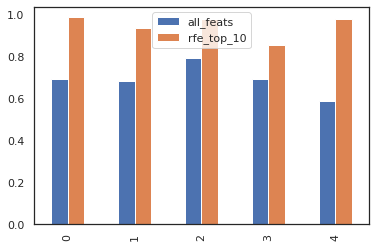

In [278]:
results_df = pd.DataFrame({'all_feats': all_feat_scores, 'rfe_top_10': rfe_top_10_scores})
results_df.plot(y=["all_feats", "rfe_top_10"], kind="bar")

Here, we can see that the model based on RFE is giving the best result for each fold 

# **Linear SVC**

In [ ]:
from sklearn.svm import LinearSVC
#X_train, X_test, y_train, y_test = train_test_split(train_x_scaled, test_x_scaled, random_state = 0)

SVCL = LinearSVC(C=22).fit(train_x, train_y)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(SVCL.score(train_x, train_y)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(SVCL.score(test_x, test_y)))

In [ ]:
test_predict = SVCL.predict(test_x)
k = recall_score(test_predict, test_y)
print('Test recall_score    ', k )

In [ ]:
train_predict = SVCL.predict(train_x)
k = recall_score(train_predict, train_y)
print('Train recall_score    ', k )

# **SVC with RBF**

In [ ]:
from sklearn.svm import SVC
SVCR = SVC(C=20).fit(train_x, train_y)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(SVCR.score(train_x, train_y)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(SVCR.score(test_x, test_y)))

In [ ]:
test_predict = SVCR.predict(test_x)
k = recall_score(test_predict, test_y)
print('Test recall_score    ', k )

In [ ]:
train_predict = SVCR.predict(train_x)
k = recall_score(train_predict, train_y)
print('Train recall_score    ', k )

# **Decission Tress**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


clf1 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 6,
                            random_state = 0).fit(train_x, train_y)

print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(train_x, train_y)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(test_x, test_y)))

In [ ]:
train_predict = clf1.predict(train_x)
k = recall_score(train_predict, train_y)
print('Train recall_score    ', k )

In [ ]:
test_predict = clf1.predict(test_x)
k = recall_score(test_predict, test_y)
print('Test recall_score    ', k )

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(train_x,train_y)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(train_x,train_y)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(test_x,test_y)))

In [ ]:
test_predict = nbclf.predict(test_x)
k = recall_score(test_predict, test_y)
print('Test recall_score    ', k )

In [ ]:
train_predict = nbclf.predict(train_x)
k = recall_score(train_predict, train_y)
print('Train recall_score    ', k )

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features = 6, max_depth = 3, random_state = 0)
rf.fit(train_x,train_y)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(train_x,train_y)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(test_x,test_y)))

In [ ]:
train_predict = rf.predict(train_x)
k = recall_score(train_predict, train_y)
print('Train recall_score    ', k )

In [ ]:
test_predict = rf.predict(test_x)
k = recall_score(test_predict, test_y)
print('Test recall_score    ', k )

# **Gradient Boosted decision Trees**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(random_state = 0)
gbdt.fit(train_x,train_y)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(gbdt.score(train_x,train_y)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(gbdt.score(test_x,test_y )))

In [ ]:
test_predict = gbdt.predict(test_x)
k = recall_score(test_predict, test_y)
print('Test recall_score    ', k )

In [ ]:
train_predict = gbdt.predict(train_x)
k = recall_score(train_predict, train_y)
print('Train recall_score    ', k )

In [ ]:
clf = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, random_state = 0)
clf.fit(train_x,train_y)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(train_x,train_y)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(test_x,test_y )))

In [ ]:
train_predict = clf.predict(train_x)
k = recall_score(train_predict, train_y)
print('Train recall_score    ', k )

In [ ]:
test_predict = clf.predict(test_x)
k = recall_score(test_predict, test_y)
print('Test recall_score    ', k )

# **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(hidden_layer_sizes = [1], alpha = 0.01,
                   random_state = 0, solver='lbfgs').fit(train_x,train_y)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(train_x,train_y)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(test_x,test_y)))

In [ ]:
test_predict = NN.predict(test_x)
k = recall_score(test_predict, test_y)
print('Test recall_score    ', k )

In [ ]:
train_predict = NN.predict(train_x)
k = recall_score(train_predict, train_y)
print('Train recall_score    ', k )

# **Dimensionality reduction**

# *Low variance  Filter*

In [ ]:
#normalizing the data
from sklearn.preprocessing import normalize
normalize = normalize(data)


In [ ]:
#converting to DataFrame
data_scaled = pd.DataFrame(normalize)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.012739,0.002831,0.010616,0.000708,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707007,0.707007,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.010616,0.000708,0.009908,0.000708,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707032,0.707032,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.019646,0.000578,0.577239,0.000578,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577239,0.577239,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.036753,0.003534,0.011309,0.002827,0.000707,0.026151,0.026151,0.000707,0.00212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.706090,0.706090,0.000707,0.0,0.000707,0.0,0.0,0.0,0.0,0.0
4,0.032537,0.002122,0.014854,0.002829,0.000000,0.000000,0.000000,0.000707,0.01061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.706610,0.706610,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
#calculating variances for every feature
data_scaled.var()

0     3.703945e-02
1     6.839821e-03
2     1.839445e-02
3     1.761608e-02
4     2.751691e-03
5     3.771126e-03
6     2.870346e-03
7     7.665062e-03
8     7.978916e-03
9     8.654863e-03
10    8.736903e-03
11    5.335236e-03
12    5.426520e-03
13    5.358594e-03
14    5.387184e-03
15    5.384133e-03
16    5.359490e-03
17    5.377027e-03
18    5.386317e-03
19    5.386395e-03
20    5.386326e-03
21    5.387184e-03
22    5.376069e-03
23    5.386328e-03
24    5.386312e-03
25    8.441731e-05
26    4.552133e-02
27    4.575761e-02
28    5.232885e-07
29    3.567589e-09
30    5.229258e-07
31    5.245021e-07
32    6.127621e-06
33    1.207891e-05
34    6.457621e-06
35    9.832872e-06
dtype: float64

In [ ]:
#storing features and variances
variances = data_scaled.var()
features = data.columns

In [ ]:
#saving the features having varince more than threshold value
variables = [ ]
for i in range(0,len(variances)):
  if variances[i] > 0.006 :
    variables.append(features[i])
features.shape

(36,)

* All the variables having considerable variance

# *High correlation filter*

In [ ]:
#dropping the target variable
data = data.drop('Biopsy',axis =1)


Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [ ]:
#obtaining correlation 
data.corr()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Age,1.000000,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862
STDs: Number of diagnosis,-0.001606,1.000000,-0.015423,0.008070,-0.015423,-0.002289,0.076787,0.130873,0.055114
Dx:Cancer,0.110340,-0.015423,1.000000,-0.015072,0.886508,0.665647,0.134264,0.157812,0.113446
Dx:CIN,0.061443,0.008070,-0.015072,1.000000,-0.015072,0.606939,-0.021233,0.009119,-0.023938
Dx:HPV,0.101722,-0.015423,0.886508,-0.015072,1.000000,0.616327,0.134264,0.157812,0.113446
Dx,0.092635,-0.002289,0.665647,0.606939,0.616327,1.000000,0.072215,0.098952,0.088740
Hinselmann,-0.003967,0.076787,0.134264,-0.021233,0.134264,0.072215,1.000000,0.650249,0.192467
Schiller,0.103283,0.130873,0.157812,0.009119,0.157812,0.098952,0.650249,1.000000,0.361486
Citology,-0.016862,0.055114,0.113446,-0.023938,0.113446,0.088740,0.192467,0.361486,1.000000


* correlatin is only for continous variables

In [ ]:
#creating correlation matrix
corr_matrix = data.corr().abs()

In [ ]:
#sellecting upper triangle from correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

In [ ]:
upper

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Age,NaN,0.001606,0.110340,0.061443,0.101722,0.092635,0.003967,0.103283,0.016862
STDs: Number of diagnosis,NaN,NaN,0.015423,0.008070,0.015423,0.002289,0.076787,0.130873,0.055114
Dx:Cancer,NaN,NaN,NaN,0.015072,0.886508,0.665647,0.134264,0.157812,0.113446
Dx:CIN,NaN,NaN,NaN,NaN,0.015072,0.606939,0.021233,0.009119,0.023938
Dx:HPV,NaN,NaN,NaN,NaN,NaN,0.616327,0.134264,0.157812,0.113446
Dx,NaN,NaN,NaN,NaN,NaN,NaN,0.072215,0.098952,0.088740
Hinselmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650249,0.192467
Schiller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361486
Citology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#finding the index of the variables having the correlation grater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop

['Dx:HPV', 'Dx', 'Schiller']

# **forwardfeature selection**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

In [ ]:
X = data.drop(['Biopsy', 'Dx:HPV', 'Dx', 'Schiller'], axis=1)
X = X.iloc[:,0:5]
y = data['Biopsy']

In [ ]:
#calling the linear regression model
lreg = LogisticRegression()
sfs1 = sfs(lreg, k_features=1, forward=False, verbose=2, scoring='neg_mean_squared_error')